# Fun with SDEs

In [164]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10**4
dt = 1/num_steps
a = 1.0

In [165]:
# generating multivariate normal, scaled to get Bt
def get_brownian(num_steps = num_steps):
    b = np.random.normal(0, 1, int(num_steps))*np.sqrt(dt)
    # 'integrate'
    Bt = np.cumsum(b)
    return Bt

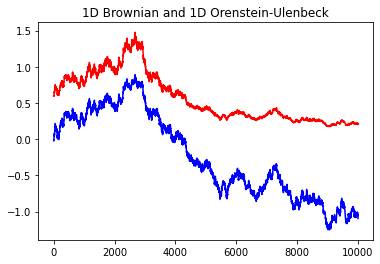

In [166]:
B_t = get_brownian(num_steps)
Z_t = np.exp(a*B_t - (a**2.0)/2.0) # mean-reverting Brownian motion (Orenstein-Ulenbeck)

plt.title('1D Brownian and 1D Orenstein-Ulenbeck')
plt.plot(B_t, 'b', Z_t,'r');

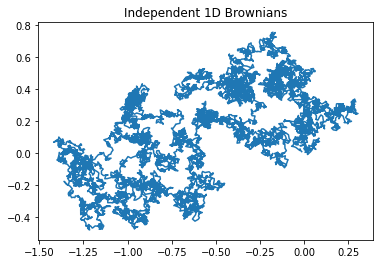

In [167]:
# getting independent brownians
x = get_brownian(num_steps)
y = get_brownian(num_steps)

plt.title('Independent 1D Brownians')
plt.plot(x,y);

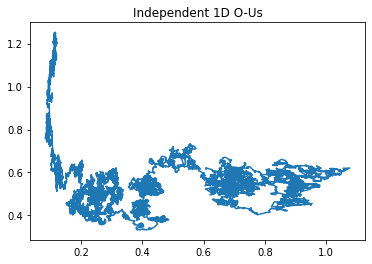

In [168]:
x = get_ornstein_uhlenbeck(num_steps)
y = get_ornstein_uhlenbeck(num_steps)

plt.title('Independent 1D O-Us')
plt.plot(x,y);

# Elastica Models

$$
\frac{d \mathcal{X}}{dt} = \cos \Theta, \;
\frac{d \mathcal{Y}}{dt} = \sin \Theta, \;
\Theta = \mathcal{B}
$$



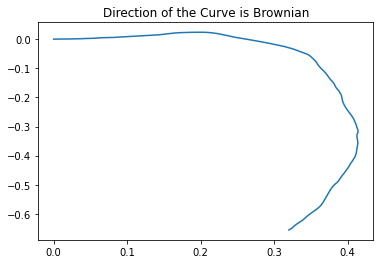

In [170]:
num_steps = 10**6
dt = 1/num_steps

thetas = [0]*num_steps
Ys = [0]*num_steps
Xs = [0]*num_steps

for k in range(1, num_steps):
  Xs[k] = Xs[k-1] + np.cos(thetas[k-1])*dt
  Ys[k] = Ys[k-1] + np.sin(thetas[k-1])*dt
  thetas[k] = thetas[k-1] + np.random.normal(0.0, 1.0)*np.sqrt(dt)

plt.title('Direction of the Curve is Brownian')
plt.plot(Xs, Ys);

$$
\frac{d \mathcal{X}}{dt} = \cos \Theta, \;
\frac{d \mathcal{Y}}{dt} = \sin \Theta, \;
\frac{d \Theta}{dt} = \kappa, \;
\kappa = \mathcal{B}
$$

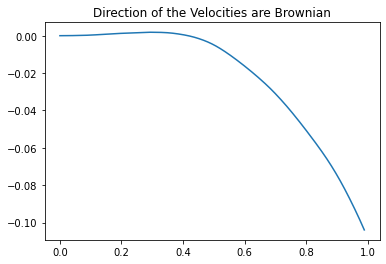

In [171]:
Xs = [0]*num_steps
Ys = [0]*num_steps
thetas = [0]*num_steps
kappas = [0]*num_steps

for k in range(1, num_steps):
  Xs[k] = Xs[k-1] + np.cos(thetas[k-1])*dt
  Ys[k] = Ys[k-1] + np.sin(thetas[k-1])*dt
  thetas[k] = thetas[k-1] + kappas[k-1]*dt
  kappas[k] = kappas[k-1] - kappas[k-1]*dt + np.random.normal(0.0, 1.0)*np.sqrt(dt)

plt.title('Direction of the Velocities are Brownian')
plt.plot(Xs, Ys);